In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm

In [7]:
df = pd.read_csv("./ABCD.csv")

In [37]:
df["color_S"]=cols_S
df['C-A'] = df['C']-df['A']
df['B-D'] = df['B']-df['D']


In [196]:
paper_dict = {'Kaznatcheev2019':'green', 'Maltas2023':'orange', 'Faroukkian2020':'magenta'}
col_paper = list()
cols_S = list()

for i in df['paper']:
    if i in paper_dict.keys(): 
        col_paper.append(paper_dict[i])
    else:
        col_paper.append("black")


for i in df['S']:
    if i>0:
        cols_S.append("blue")
    else:
        cols_S.append("green")
    

In [197]:
df["paper"] = pd.Categorical(df["Paper"])


In [198]:
df['col_paper'] =col_paper 

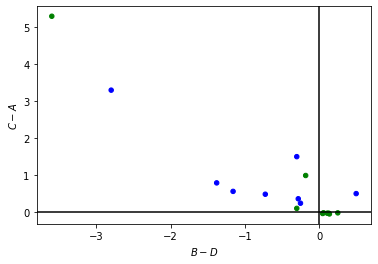

In [199]:

df.plot.scatter(x="B-D", y="C-A", c="color_S")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$B-D$")
plt.ylabel(r"$C-A$")
plt.savefig("Experimental_CA_BD.png")

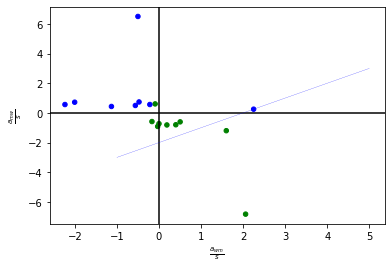

In [207]:
amw = np.linspace(-3, 3, 50) #a_mw
awm_neg = np.linspace(-3, 3, 50) #a_mw

#a_wm/s = a_mw/s + 2
awm = amw + 2
#a_wm/s = a_mw/s - 2
amw_neg = awm_neg - 2

# Maintenance
mu = 0.001
s1=s= df['S'][1]
awm_mt_pos = amw*mu/(s*(1+s))

s5=s= df['S'][5] 
awm_mt_neg = amw*(1+s)*mu/(s)

awm_mimic = -amw/(1+amw)

amw_mirror = amw
awm_mirror = amw_mirror/(1-amw_mirror/2)

df.plot.scatter(x="awm_s", y="amw_s", c="color_S")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(awm, amw, 'b', lw=0.2, label ='s>0')
plt.xlabel(r"$\frac{a_{wm}}{s}$")
plt.ylabel(r"$\frac{a_{mw}}{s}$")
plt.savefig("Experimental.png")

In [201]:
awm_mt_s1

array([-0.01690575, -0.01621572, -0.01552569, -0.01483566, -0.01414563,
       -0.0134556 , -0.01276556, -0.01207553, -0.0113855 , -0.01069547,
       -0.01000544, -0.00931541, -0.00862538, -0.00793535, -0.00724532,
       -0.00655529, -0.00586526, -0.00517523, -0.0044852 , -0.00379517,
       -0.00310514, -0.00241511, -0.00172508, -0.00103505, -0.00034502,
        0.00034502,  0.00103505,  0.00172508,  0.00241511,  0.00310514,
        0.00379517,  0.0044852 ,  0.00517523,  0.00586526,  0.00655529,
        0.00724532,  0.00793535,  0.00862538,  0.00931541,  0.01000544,
        0.01069547,  0.0113855 ,  0.01207553,  0.01276556,  0.0134556 ,
        0.01414563,  0.01483566,  0.01552569,  0.01621572,  0.01690575])

No handles with labels found to put in legend.


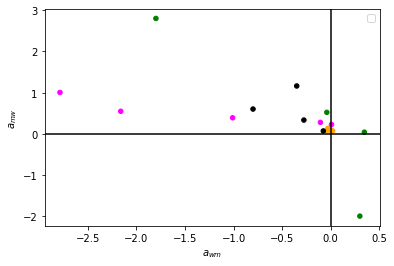

In [202]:
x = np.linspace(-3, 3, 50)
y = x -2*s5
y2 = x + 2*s1


df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
#plt.plot(awm_mt_pos, amw, 'y', lw=2, label ='s>0')
#plt.plot(amw, awm_mt_neg, 'r', lw=2, label ='s<0')
#plt.plot(y2, x, 'b', lw=2, label ='s<0')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
#plt.plot(awm_mimic[20:50], amw[20:50],'b',lw=2, label ='s<0')

plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")
plt.savefig("Experimental.png")

plt.legend()

No handles with labels found to put in legend.


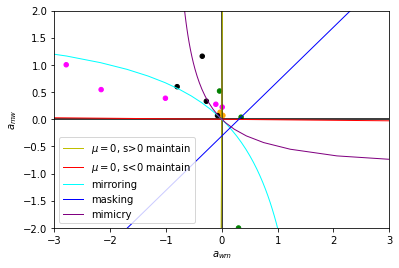

In [220]:
x = np.linspace(-3, 3, 50)
y = x -2*s5
y2 = x + 2*s1

df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.legend()
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(awm_mt_pos, amw, 'y', lw=1, label =r'$\mu=0$, s>0 maintain')
plt.plot(amw, awm_mt_neg, 'r', lw=1, label =r'$\mu=0$, s<0 maintain')
plt.plot(-awm_mirror[0:40], amw_mirror[0:40],c='cyan', lw=1, label ='mirroring')
plt.plot(y2, x, 'b', lw=1, label ='masking')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
plt.plot(awm_mimic[18:50], amw[18:50],c='purple',lw=1, label ='mimicry')
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")
cats = df['paper'].unique()
#cats.add(["masking", "mimicry"])
#cats = cats.add_categories()
plt.legend(paper_dict)
#plt.legend(['','', r'$\mu=0$, s>0 maintain', r'$\mu=0$, s<0 maintain', 'mirroring','masking','mimicry'])

import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental.png")


AttributeError: module 'matplotlib' has no attribute 'colormaps'

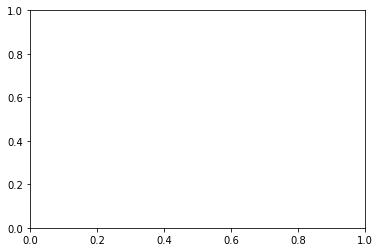

In [16]:
x = np.linspace(-4, 7, 50)


df.plot.scatter(x="awm_s", y="amw_s", c="paper", cmap="plasma"); plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(x, y, 'b', lw=0.2, label ='Masking')
#plt.plot(y2,x, 'r', lw=0.2, label ='Mimicry')
plt.xlabel(r"$\frac{a_{wm}}{s}$")
plt.ylabel(r"$\frac{a_{mw}}{s}$")
plt.savefig("Experimental.png")